In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import sklearn.svm
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as rmse

# Lectura de Datos

In [10]:
train = pd.read_excel("train.xlsx")
val = pd.read_excel("val.xlsx")

# Agrupación de datos

Día

In [11]:
train_dia = train.groupby(['BARRIO','DIA','MES','ANIO']).sum().reset_index()
#data_dia = data_dia.to_frame()
train_dia.to_excel("train_dia.xlsx",index=False)
train_dia.head()

BARRIO  DIA  MES  ANIO  ESPECIAL  atropello  caida_ocupante  choque  \
0  aguas frias    2    5  2018         0          0               0       1   
1  aguas frias    2    8  2018         0          1               0       0   
2  aguas frias    4   11  2018         0          0               1       1   
3  aguas frias   10    8  2018         0          1               0       0   
4  aguas frias   19   10  2018         0          0               0       0   

   otro  volcamiento  incendio  choque_atropello  
0     0            0         0                 0  
1     0            0         0                 0  
2     0            0         0                 0  
3     0            0         0                 0  
4     1            0         0                 0

In [12]:
val_dia = val.groupby(['BARRIO','DIA','MES','ANIO']).sum().reset_index()
#data_dia = data_dia.to_frame()
val_dia.to_excel("val_dia.xlsx",index=False)
val_dia.head()

BARRIO  DIA  MES  ANIO  FECHAS_ESPECIALES  atropello  caida_ocupante  \
0  aguas frias    1    2  2015                  0          0               0   
1  aguas frias    1    3  2014                  0          0               0   
2  aguas frias    1    9  2014                  0          0               0   
3  aguas frias    1   10  2015                  0          0               0   
4  aguas frias    2    5  2016                  0          0               0   

   choque  otro  volcamiento  incendio  choque_atropello  
0       0     1            0         0                 0  
1       1     0            0         0                 0  
2       1     0            0         0                 0  
3       1     0            0         0                 0  
4       1     0            0         0                 0

Mes

In [67]:
train_mes = train.groupby(['BARRIO','MES','ANIO']).sum().reset_index()
#data_dia = data_dia.to_frame()
train_mes.to_excel("train_mes.xlsx",index=False)
train_mes.head()

BARRIO  MES  ANIO  DIA  atropello  caida_ocupante  choque  \
0  aguas frias    1  2014   30          0               0       1   
1  aguas frias    1  2015   13          0               0       0   
2  aguas frias    1  2016   26          0               0       2   
3  aguas frias    2  2014   10          0               0       2   
4  aguas frias    2  2015   28          0               0       1   

   choque_atropello  incendio  otro  volcamiento  
0                 0         0     0            0  
1                 0         0     1            0  
2                 0         0     1            0  
3                 0         0     0            0  
4                 0         0     1            0

In [68]:
val_mes = val.groupby(['BARRIO','MES','ANIO']).sum().reset_index()
#data_dia = data_dia.to_frame()
val_mes.to_excel("val_mes.xlsx",index=False)
val_mes.head()

BARRIO  MES  ANIO  DIA  atropello  caida_ocupante  choque  \
0     aguas frias    5  2018   22          0               0       2   
1     aguas frias    8  2018   12          2               0       0   
2     aguas frias   10  2018   19          0               0       0   
3     aguas frias   11  2018    8          0               1       1   
4  aldea pablo vi    1  2018   24          2               0       0   

   choque_atropello  incendio  otro  volcamiento  
0                 0         0     0            0  
1                 0         0     0            0  
2                 0         0     1            0  
3                 0         0     0            0  
4                 0         0     0            0

# Predictor Mensual

# Lectura de datos

In [7]:
train = pd.read_excel("train_mes.xlsx")
val = pd.read_excel("val_mes.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'train_mes.xlsx'

# LabelEncoder

LabelEnconder para el atributo barrio

In [4]:
le = LabelEncoder()
le.fit(train['BARRIO'].unique())
train['BARRIO_ENCODER']=le.transform(train['BARRIO'])
le = LabelEncoder()
le.fit(val['BARRIO'].unique())
val['BARRIO_ENCODER']=le.transform(val['BARRIO'])
train.head()
val.head()

LabelEncoder()

# X y y

In [10]:
X_train = train[['BARRIO_ENCODER','MES','ANIO']].values
y_train = train[['atropello','caida_ocupante','choque','choque_atropello','incendio','otro','volcamiento']].values

# Normalización

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
joblib.dump(min_max_scaler,"models/scaler_mes.pkl")

# Entrenamiento del modelo

## Maquina de Soporte Vectorial

In [49]:
svm =  MultiOutputRegressor(sklearn.svm.SVR(),n_jobs=-1)
scores = cross_val_score(svm, X_train, y_train, cv=5,scoring = 'neg_mean_squared_error')
print('R2 promedio:',np.mean(scores))
svm = svm.fit(X_train,y_train)
joblib.dump(svm, 'models/svm_mes.pkl')

R2 promedio: -21.910033111997084


['models/svm.pkl']

In [50]:
y_pred = svm.predict(X_train)
rmse(y_train, y_pred)

22.39872632947792

## Bosque Aleatorio

In [86]:
bosque =  RandomForestRegressor()
scores = cross_val_score(bosque, X_train, y_train, cv=5,scoring = 'neg_mean_squared_error')
print('R2 promedio:',np.mean(scores))
bosque = bosque.fit(X_train,y_train)
joblib.dump(bosque, 'models/bosque_mes.pkl',compress=9)

R2 promedio: -2.8444194695475953


['models/bosque.pkl']

In [ ]:
y_pred = bosque.predict(X_train)
rmse(y_train, y_pred)

### Ajuste de Parametros

In [ ]:
clf =  RandomForestClassifier()
tuned_params = { 
            "criterion": ['entropy','gini'],
            "max_features": [1,2,4,8,16],
            "n_estimators" :[512,1024],
            "min_samples_split" : [2,4,8,16,32],
            "bootstrap" : [False,True],
            "max_features": ['auto','sqrt'],
            "max_depth": [2,4,8,16,32,64,128]
            }


clf = GridSearchCV(clf, tuned_params,cv=5,scoring='neg_mean_squared_error',n_jobs = -1)
clf.fit(X,y)
print("Mejores Parametros Encontrados")
print(clf.best_params_)

##
## Se entrena el clasificador
##
clf =  RandomForestClassifier(
    criterion  = clf.best_params_['criterion'],
    max_features  = clf.best_params_['max_features'],
    n_estimators  = clf.best_params_['n_estimators'],
    min_samples_split  = clf.best_params_['min_samples_split'],
    bootstrap  = clf.best_params_['bootstrap'],
    max_depth  = clf.best_params_['max_depth'],
)


scores = cross_val_score(clf, X_train, y_train, cv=5,scoring = 'neg_mean_squared_error')
print('RMSE CV entrenamiento promedio:',np.mean(scores))

### Se guarda el Modelo

bosque = clf.fit(X_train,y_train)
joblib.dump(bosque, 'models/bosque_tuning_mes.pkl',compress=9)



y_pred = bosque.predict(X_train)
print("RMSE entrenamiento:",rmse(y_train, y_pred)

## Red Neuronal

parametros = {"hidden_layer_sizes":  [(18,),(20,),(25,),(50,),(100,),(18,2),(20,2),(25,2),(18,3),(20,3),(25,3),(18,4),(20,4),(25,4),(50,4),(100,4),(200,4),(18,5),(20,5),(25,5),(50,5),(100,5),(200,5)]}
red = sklearn.neural_network.MLPClassifier()
clf = GridSearchCV(red, parametros,cv=5,scoring='f1',n_jobs = -1)
clf.fit(X_train,y_train)
print("Mejores Parametros Encontrados")
print(clf.best_params_)

# Validacion

In [22]:
X_val = val[['BARRIO_ENCODER','MES','ANIO']].values
y_val = val[['atropello','caida_ocupante','choque','choque_atropello','incendio','otro','volcamiento']].values
X_val = min_max_scaler.transform(X_val)

## Bosque Aleatorio

In [27]:
y_pred = bosque.predict(X_val)
print("Error de validación:",rmse(y_val, y_pred))
y_val = pd.DataFrame(y_val)
y_pred = pd.DataFrame(y_pred)
plt.plot([i for i in range(100)],list(y_pred[0])[0:100])
plt.plot([i for i in range(100)],list(y_val[0])[0:100])

-0.2779509908575746

## SVM

In [52]:
y_pred = svm.predict(X_val)
print("RMSE  VALIDACION:",rmse(y_val, y_pred))
y_val = pd.DataFrame(y_val)
y_pred = pd.DataFrame(y_pred)
plt.plot([i for i in range(100)],list(y_pred[0])[0:100])
plt.plot([i for i in range(100)],list(y_val[0])[0:100])

22.95022740943588

# PREDICTOR DIARIO

## Lectura de Datos

In [25]:
train = pd.read_excel("train_dia.xlsx")
val = pd.read_excel("val_dia.xlsx")

## LabelEncoder

In [27]:
le = LabelEncoder()
le.fit(train['BARRIO'].unique())
train['BARRIO_ENCODER']=le.transform(train['BARRIO'])
le = LabelEncoder()
le.fit(val['BARRIO'].unique())
val['BARRIO_ENCODER']=le.transform(val['BARRIO'])
train.head()
val.head()

BARRIO  DIA  MES  ANIO  ESPECIAL  atropello  caida_ocupante  choque  \
0  aguas frias    1    2  2015         0          0               0       0   
1  aguas frias    1    3  2014         0          0               0       1   
2  aguas frias    1    9  2014         0          0               0       1   
3  aguas frias    1   10  2015         0          0               0       1   
4  aguas frias    2    5  2016         0          0               0       1   

   otro  volcamiento  incendio  choque_atropello  BARRIO_ENCODER  
0     1            0         0                 0               0  
1     0            0         0                 0               0  
2     0            0         0                 0               0  
3     0            0         0                 0               0  
4     0            0         0                 0               0

## X y y

In [16]:
X_train = train[['BARRIO_ENCODER','MES','ANIO','ESPECIAL']].values
y_train = train[['atropello','caida_ocupante','choque','choque_atropello','incendio','otro','volcamiento']].values

## Normalización

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
joblib.dump(min_max_scaler,"models/scaler_dia.pkl")

['scaler_dia.pkl']

# Entrenamiento del Modelo

## SVM

In [20]:
svm =  MultiOutputRegressor(sklearn.svm.SVR(),n_jobs=-1)
scores = cross_val_score(svm, X_train, y_train, cv=5,scoring = 'neg_mean_squared_error')
print('RMSE promedio:',np.mean(scores))
svm = svm.fit(X_train,y_train)
joblib.dump(svm, 'models/svm_dia.pkl')

RMSE promedio: -0.18991969855751661


['models/svm_dia.pkl']

In [21]:
y_pred = svm.predict(X_train)
rmse(y_train, y_pred)

0.18535355639963189

## Bosque Aleatorio

In [22]:
bosque =  RandomForestRegressor()
scores = cross_val_score(bosque, X_train, y_train, cv=5,scoring = 'neg_mean_squared_error')
print('RMSE promedio:',np.mean(scores))
bosque = bosque.fit(X_train,y_train)
joblib.dump(bosque, 'models/bosque_dia.pkl',compress=9)

RMSE promedio: -0.2588238878888148


['models/bosque.pkl']

In [23]:
y_pred = bosque.predict(X_train)
rmse(y_train, y_pred)

0.1340791016924644

### Ajuste de parametros

In [ ]:
clf =  RandomForestClassifier()
tuned_params = { 
            "criterion": ['entropy','gini'],
            "max_features": [1,2,4,8,16],
            "n_estimators" :[512,1024],
            "min_samples_split" : [2,4,8,16,32],
            "bootstrap" : [False,True],
            "max_features": ['auto','sqrt'],
            "max_depth": [2,4,8,16,32,64,128]
            }


clf = GridSearchCV(clf, tuned_params,cv=5,scoring='neg_mean_squared_error',n_jobs = -1)
clf.fit(X,y)
print("Mejores Parametros Encontrados")
print(clf.best_params_)

##
## Se entrena el clasificador
##
clf =  RandomForestClassifier(
    criterion  = clf.best_params_['criterion'],
    max_features  = clf.best_params_['max_features'],
    n_estimators  = clf.best_params_['n_estimators'],
    min_samples_split  = clf.best_params_['min_samples_split'],
    bootstrap  = clf.best_params_['bootstrap'],
    max_depth  = clf.best_params_['max_depth'],
)


scores = cross_val_score(clf, X_train, y_train, cv=5,scoring = 'neg_mean_squared_error')
print('RMSE CV entrenamiento promedio:',np.mean(scores))

### Se guarda el Modelo

bosque = clf.fit(X_train,y_train)
joblib.dump(bosque, 'models/bosque_tuning_dia.pkl',compress=9)



y_pred = bosque.predict(X_train)
print("RMSE entrenamiento:",rmse(y_train, y_pred)

# Validación

In [32]:
X_val = val[['BARRIO_ENCODER','MES','ANIO','ESPECIAL']].values
y_val = val[['atropello','caida_ocupante','choque','choque_atropello','incendio','otro','volcamiento']].values
X_val = min_max_scaler.transform(X_val)

## Bosque Aleatorio

0.21104036997715975


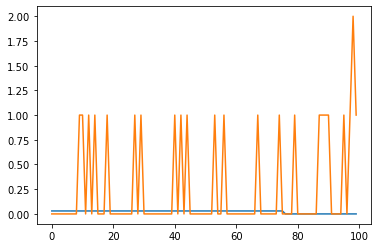

In [33]:
y_pred = bosque.predict(X_val)
print(rmse(y_val, y_pred))
y_val = pd.DataFrame(y_val)
y_pred = pd.DataFrame(y_pred)
plt.plot([i for i in range(100)],list(y_pred[0])[0:100])
plt.plot([i for i in range(100)],list(y_val[0])[0:100])

## SVM

rmse: 0.19528018668677835


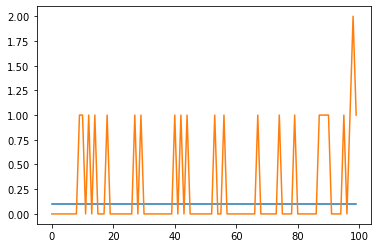

In [34]:
y_pred = svm.predict(X_val)
print("rmse:",rmse(y_val, y_pred))
y_val = pd.DataFrame(y_val)
y_pred = pd.DataFrame(y_pred)
plt.plot([i for i in range(100)],list(y_pred[0])[0:100])
plt.plot([i for i in range(100)],list(y_val[0])[0:100])